In [4]:
import psycopg2
import pandas as pd
import datetime
import numpy as np
from unidecode import unidecode
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import IsolationForest
import os
import sys
import pickle


In [5]:
def load_model(file_path, file_name):
    full_file_path = os.path.join(file_path, file_name)
    with open(full_file_path, 'rb') as handle:
        loaded_model = pickle.load(handle)
    return loaded_model

In [6]:
trained_model_90_file_name = 'mvp_1_model_90_opt_new_vars_230924.pickle'
trained_models_path = ''
model_90_new_vars = load_model(trained_models_path, trained_model_90_file_name)


In [7]:
AV_train_90 = pd.read_pickle("df_output_90.pickle")
AV_train_90_nunique = AV_train_90.nunique()
cols_to_drop_unique_value_90 = AV_train_90_nunique[AV_train_90_nunique == 1].index.to_list()
if len(cols_to_drop_unique_value_90) > 0:
        AV_train_90.drop(cols_to_drop_unique_value_90, axis=1, inplace=True)
#print(AV_train_90.shape)
AV_train_90.dropna(inplace=True)
variables = ['creditorParticipant_ratio', 'creditorParticipant_currency_ratio', 'creditorParticipant_channel_ratio', 'creditorParticipant_responseCode_ratio', 'creditorParticipant_debtorParticipant_ratio', 'creditorParticipant_Weekday_ratio', 'creditorParticipant_time_interval_ratio', 'creditorParticipant_creditorCCI_ratio', 'currency_ratio', 'currency_channel_ratio', 'currency_responseCode_ratio', 'currency_debtorParticipant_ratio', 'currency_Weekday_ratio', 'currency_time_interval_ratio', 'currency_creditorCCI_ratio', 'channel_ratio', 'channel_responseCode_ratio', 'channel_debtorParticipant_ratio', 'channel_Weekday_ratio', 'channel_time_interval_ratio', 'channel_creditorCCI_ratio', 'responseCode_ratio', 'responseCode_debtorParticipant_ratio', 'responseCode_Weekday_ratio', 'responseCode_time_interval_ratio', 'responseCode_creditorCCI_ratio', 'debtorParticipant_ratio', 'debtorParticipant_Weekday_ratio', 'debtorParticipant_time_interval_ratio', 'debtorParticipant_creditorCCI_ratio', 'Weekday_ratio', 'Weekday_time_interval_ratio', 'Weekday_creditorCCI_ratio', 'time_interval_ratio', 'time_interval_creditorCCI_ratio', 'creditorCCI_ratio', 'debtorId', 'creditorCCI', 'hourSin', 'hourCos', 'dayOfYearSin', 'dayOfYearCos', 'dayOfMonthSin', 'dayOfMonthCos', 'dayOfWeekSin', 'dayOfWeekCos','debtorParticipant_bcp','debtorParticipant_interbank','debtorParticipant_citibank','debtorParticipant_scotiabank','debtorParticipant_bbva','debtorParticipant_banco_de_la_nacion','debtorParticipant_comercio','debtorParticipant_banco_pichincha','debtorParticipant_banbif','debtorParticipant_crediscotia_financiera','debtorParticipant_mi_banco','debtorParticipant_gnb','debtorParticipant_banco_falabella','debtorParticipant_banco_ripley','debtorParticipant_alfin_banco_s.a.','debtorParticipant_financiera_oh','debtorParticipant_financiera_efectiva','debtorParticipant_caja_piura','debtorParticipant_caja_trujillo','debtorParticipant_caja_arequipa','debtorParticipant_caja_sullana','debtorParticipant_caja_cusco','debtorParticipant_caja_huancayo','debtorParticipant_caja_ica','debtorParticipant_invalid','creditorParticipant_bcp','creditorParticipant_interbank','creditorParticipant_citibank','creditorParticipant_scotiabank','creditorParticipant_bbva','creditorParticipant_banco_de_la_nacion','creditorParticipant_comercio','creditorParticipant_banco_pichincha','creditorParticipant_banbif','creditorParticipant_crediscotia_financiera','creditorParticipant_mi_banco','creditorParticipant_gnb','creditorParticipant_banco_falabella','creditorParticipant_banco_ripley','creditorParticipant_alfin_banco_s.a.','creditorParticipant_financiera_oh','creditorParticipant_financiera_efectiva','creditorParticipant_caja_piura','creditorParticipant_caja_trujillo','creditorParticipant_caja_arequipa','creditorParticipant_caja_sullana','creditorParticipant_caja_cusco','creditorParticipant_caja_huancayo','creditorParticipant_caja_ica','creditorParticipant_invalid', 'currency_soles', 'channel_banca_movil', 'channel_invalid', 'channel_web', 'responseCode_rejected']

NEW_VARIABLES_FLAG = True
if NEW_VARIABLES_FLAG:
    new_columns = ['f1d',
        'f7d',
        'f30d',
        'f90d',
        'f1d_to_creditor',
        'f7d_to_creditor',
        'f30d_to_creditor',
        'f90d_to_creditor',
        'unique_debtors_past_1d',
        'unique_debtors_past_7d',
        'unique_debtors_past_30d',
        'unique_debtors_past_90d',
        'prop_invalid_1d',
        'prop_banca_movil_1d',
        'prop_web_1d',
        'prop_atm_1d',
        'prop_invalid_7d',
        'prop_banca_movil_7d',
        'prop_web_7d',
        'prop_atm_7d',
        'prop_invalid_30d',
        'prop_banca_movil_30d',
        'prop_web_30d',
        'prop_atm_30d',
        'prop_invalid_90d',
        'prop_banca_movil_90d',
        'prop_web_90d',
        'prop_atm_90d',
    ]
    new_ratios = [
        "creditorParticipant_creditorId_ratio",
        "currency_creditorId_ratio",
        "channel_creditorId_ratio",
        "responseCode_creditorId_ratio",
        "debtorParticipant_creditorId_ratio",
        "Weekday_creditorId_ratio",
        "time_interval_creditorId_ratio",
        "creditorCCI_creditorId_ratio",
        "creditorId_ratio",
    ]
    variables += new_columns + new_ratios

for col in variables:
    if col not in AV_train_90.columns:
        AV_train_90[col] = 0

for x in AV_train_90.columns:
    if x not in variables:
        print("dropping...", x)
AV_train_90 = AV_train_90[variables]


dropping... same_customer_flag


In [8]:
id_cols = ["debtorId",'creditorCCI']
X = AV_train_90.drop(id_cols, axis=1)
RS = 12494328


/home/cnvdba/miniconda3/envs/mvp1_shap/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Matplotlib is building the font cache; this may take a moment.


1
2


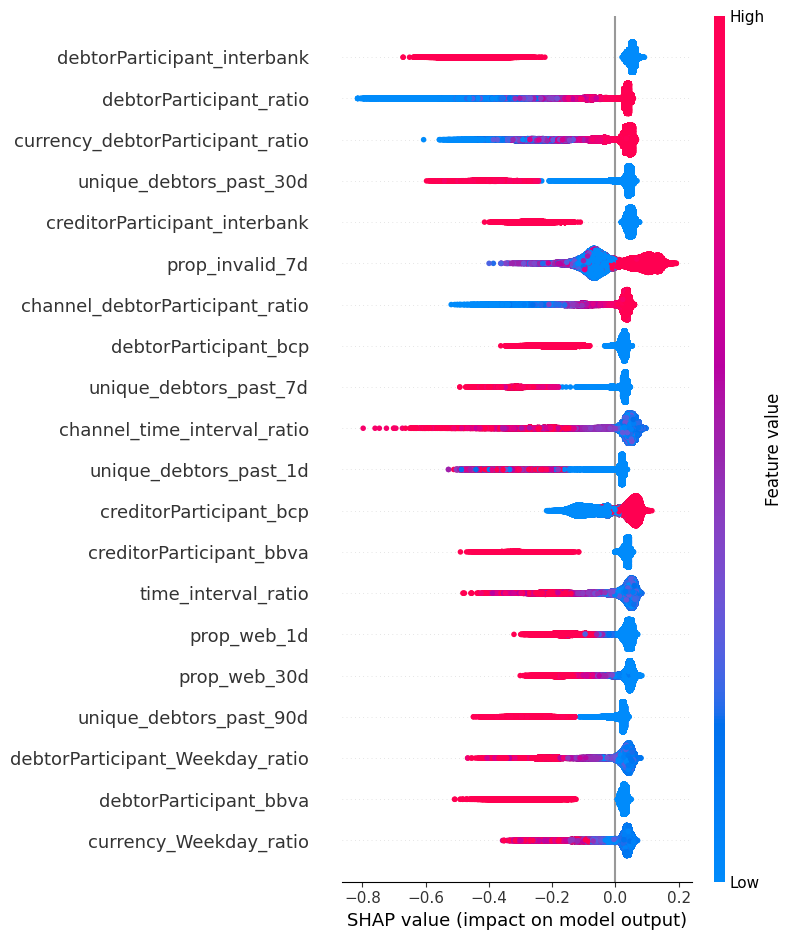

3


In [9]:
import shap

# Train your Isolation Forest model first, then:
explainer = shap.TreeExplainer(model_90_new_vars)
print("1")
shap_values = explainer.shap_values(X)
print("2")
# Plot summary of feature importance
shap.summary_plot(shap_values, X)
print("3")

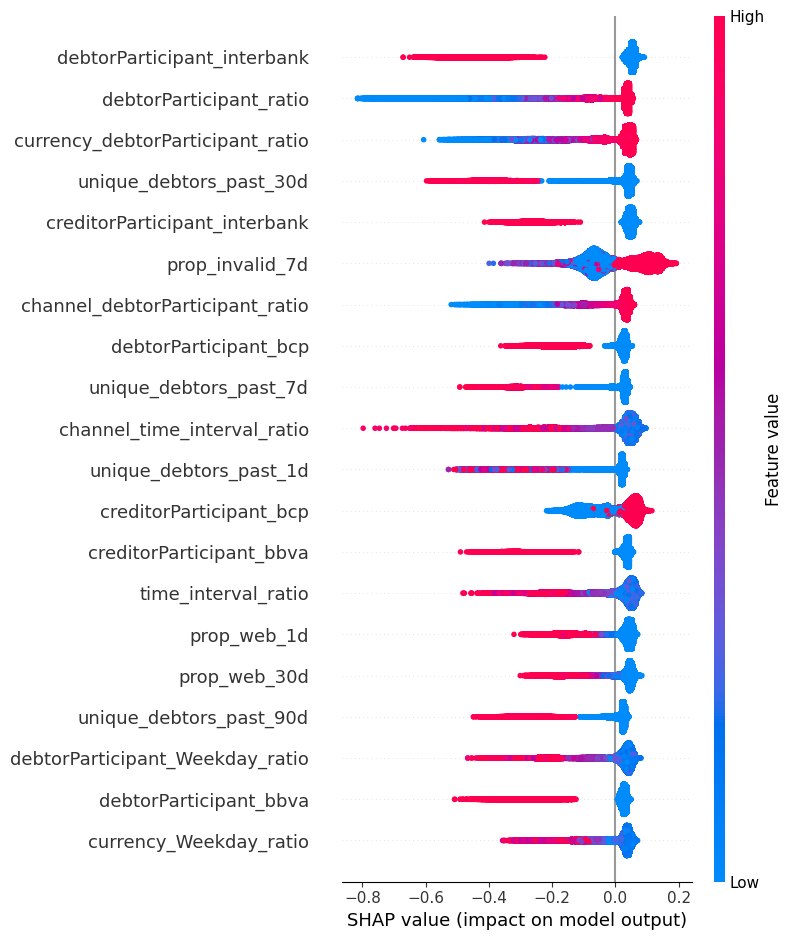

In [12]:
import matplotlib.pyplot as plt

shap.summary_plot(shap_values, X)
# Save the plot as a PNG file
plt.savefig("shap_summary_plot.png", format='png', dpi=300, bbox_inches='tight')
plt.close()  # Close the plot to free memory

In [10]:
# shap_df = pd.DataFrame(shap_values, columns=X.columns)
# mean_shap = shap_df.abs().mean().sort_values(ascending=False)
# #  Display feature importance as text
# print("Feature importance based on SHAP values:")
# for feature, importance in mean_shap.items():
#     print(f"{feature}: {importance:.4f}")

In [13]:
correlation_matrix = X.corr(method='pearson')  # or 'spearman'


In [17]:
anomaly_scores = model_90_new_vars.decision_function(X)  # or use model.score_samples(X)


In [18]:
results_df = pd.DataFrame(X)
results_df['anomaly_scores'] = anomaly_scores


In [19]:
correlation_with_scores = results_df.corr()['anomaly_scores'].drop('anomaly_scores')


In [23]:
correlation_matrix_anomaly = results_df.corr(method='pearson')

In [24]:
correlation_matrix_anomaly.to_pickle("correlation_matrix_anomaly.pickle")

In [16]:
correlation_matrix.to_pickle("correlation_matrix.pickle")

In [28]:
correlation_matrix.isna()

creditorParticipant_ratio                      4
creditorParticipant_currency_ratio             4
creditorParticipant_channel_ratio              4
creditorParticipant_responseCode_ratio         4
creditorParticipant_debtorParticipant_ratio    4
                                              ..
debtorParticipant_creditorId_ratio             4
Weekday_creditorId_ratio                       4
time_interval_creditorId_ratio                 4
creditorCCI_creditorId_ratio                   4
creditorId_ratio                               4
Length: 136, dtype: int64

In [15]:
# Optionally visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix")
plt.show()

ModuleNotFoundError: No module named 'seaborn'